In [ ]:
#Import The Solar Flare Data Set Files
!wget https://www.dropbox.com/s/uy58al2rwf6yn9u/labels_1540_4classes_icmla_21.pck
!wget https://www.dropbox.com/s/4bt5ugb9rimbrgx/mvts_1540_icmla_21.pck

--2022-05-20 04:59:42--  https://www.dropbox.com/s/uy58al2rwf6yn9u/labels_1540_4classes_icmla_21.pck
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uy58al2rwf6yn9u/labels_1540_4classes_icmla_21.pck [following]
--2022-05-20 04:59:42--  https://www.dropbox.com/s/raw/uy58al2rwf6yn9u/labels_1540_4classes_icmla_21.pck
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd622d8157448c8ba178b4340db.dl.dropboxusercontent.com/cd/0/inline/BllLdTBu-yd003SQSS-U65NB-Fk9nglAXtSTMCxkEah003m4FIcjhtyf82QqscXk5f3sQiuGDbutp8HX5UQYVKNJVD87u6S6HGEuhtCYOt12Wk0_hrVXSUcBVeD1pHDsI2spGg7F5j8JAAyaoZEEEoyuI3V4HJOP5QlCJ6ls_UbF3Q/file# [following]
--2022-05-20 04:59:42--  https://ucd622d8157448c8ba178b4340db.dl.dropboxusercontent.com/cd/0/inline/BllLd

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import pickle

In [ ]:
#Reading pickle files
def load(file_name):
    with open(file_name, 'rb') as fp:
        obj = pickle.load(fp)
    return obj


Sampled_inputs=load("mvts_1540_icmla_21.pck")

Sampled_labels=load("labels_1540_4classes_icmla_21.pck") 

temp=Sampled_inputs[0]
print(temp)
df = pd.DataFrame(temp)
trainData=Sampled_inputs
trainLabel=Sampled_labels
print("trainData.shape: ",trainData.shape)
print("trainLebel.shape: ",trainLabel.shape)

[[6.74817790e+03 6.71324549e+03 6.71174659e+03 ... 6.95126400e+03
  6.91616482e+03 6.95471100e+03]
 [8.29442125e+10 8.30111273e+10 8.32423665e+10 ... 8.90785513e+10
  8.87904201e+10 8.89243169e+10]
 [1.59122525e+24 1.59118022e+24 1.58550781e+24 ... 1.59756967e+24
  1.59518849e+24 1.58547757e+24]
 ...
 [0.00000000e+00 0.00000000e+00 3.89738644e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.42400000e+03 1.40000000e+03 1.40500000e+03 ... 2.23000000e+03
  2.29700000e+03 2.18800000e+03]
 [3.85120000e-06 7.40970000e-06 2.92150000e-06 ... 2.30850000e-06
  2.58090000e-06 6.63720000e-06]]
trainData.shape:  (1540, 33, 60)
trainLebel.shape:  (1540,)


In [ ]:
df = pd.DataFrame(trainData[0])
df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,6.748178e+03,6.713245e+03,6.711747e+03,6.903974e+03,6.691366e+03,6.834958e+03,6.830348e+03,6.894217e+03,6.906079e+03,6.899095e+03,...,6.643833e+03,6.678435e+03,6.719481e+03,6.731164e+03,6.743633e+03,6.873948e+03,6.901911e+03,6.951264e+03,6.916165e+03,6.954711e+03
1,8.294421e+10,8.301113e+10,8.324237e+10,8.343257e+10,8.370511e+10,8.406158e+10,8.431275e+10,8.429531e+10,8.449927e+10,8.451908e+10,...,8.686979e+10,8.726270e+10,8.771953e+10,8.808078e+10,8.818426e+10,8.867265e+10,8.892919e+10,8.907855e+10,8.879042e+10,8.892432e+10
2,1.591225e+24,1.591180e+24,1.585508e+24,1.576556e+24,1.600757e+24,1.591036e+24,1.589851e+24,1.577024e+24,1.586829e+24,1.601676e+24,...,1.585399e+24,1.588082e+24,1.595610e+24,1.601331e+24,1.600107e+24,1.605313e+24,1.600205e+24,1.597570e+24,1.595188e+24,1.585478e+24
3,1.095967e+14,1.082126e+14,1.074454e+14,1.084795e+14,1.086643e+14,1.096684e+14,1.083214e+14,1.090471e+14,1.088327e+14,1.091217e+14,...,1.027543e+14,1.029321e+14,1.032735e+14,1.040559e+14,1.048489e+14,1.060069e+14,1.069829e+14,1.084181e+14,1.082073e+14,1.077902e+14
4,1.510191e+03,1.552900e+03,1.569594e+03,1.608219e+03,1.479273e+03,1.644488e+03,1.587280e+03,1.530972e+03,1.580642e+03,1.562139e+03,...,1.811564e+03,1.888606e+03,1.839960e+03,1.870738e+03,1.870200e+03,1.904760e+03,1.909576e+03,1.931615e+03,1.893967e+03,1.915377e+03
5,5.537032e+13,5.163912e+13,5.208053e+13,5.166028e+13,5.030951e+13,5.663543e+13,5.648788e+13,5.153441e+13,5.204076e+13,5.105149e+13,...,5.910807e+13,6.151702e+13,6.065092e+13,6.834156e+13,6.936537e+13,6.729846e+13,6.973227e+13,7.088334e+13,6.963535e+13,7.154282e+13
6,6.524454e+22,6.552311e+22,6.582194e+22,6.609184e+22,6.614713e+22,6.630166e+22,6.649235e+22,6.685179e+22,6.646028e+22,6.593766e+22,...,6.827774e+22,6.895435e+22,6.955306e+22,6.991464e+22,7.029250e+22,7.111755e+22,7.179346e+22,7.229525e+22,7.229235e+22,7.282973e+22
7,-1.945966e+25,-1.967367e+25,-2.022283e+25,-2.072753e+25,-1.999304e+25,-2.075205e+25,-2.105215e+25,-2.175302e+25,-2.155312e+25,-2.084657e+25,...,-2.426738e+25,-2.466136e+25,-2.491348e+25,-2.486756e+25,-2.508392e+25,-2.558268e+25,-2.599559e+25,-2.639231e+25,-2.627192e+25,-2.687569e+25
8,1.346139e+04,1.345904e+04,1.339136e+04,1.324844e+04,1.336751e+04,1.329813e+04,1.339034e+04,1.325148e+04,1.348525e+04,1.372935e+04,...,1.383472e+04,1.375089e+04,1.360471e+04,1.351711e+04,1.335690e+04,1.323341e+04,1.305072e+04,1.288312e+04,1.279145e+04,1.266610e+04
9,-1.766593e-01,-1.784582e-01,-1.829300e-01,-1.870679e-01,-1.798515e-01,-1.858878e-01,-1.880141e-01,-1.943137e-01,-1.920634e-01,-1.857237e-01,...,-2.103495e-01,-2.128020e-01,-2.138579e-01,-2.125882e-01,-2.141862e-01,-2.172419e-01,-2.201115e-01,-2.230959e-01,-2.227989e-01,-2.275760e-01


In [ ]:
#standardization/z normalization of the univaraite time series
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
npArrays=[]
for l in range(0, len(trainData)):
  trainData_std = sc.fit_transform(trainData[l])
  #trainData_std = trainData_std.astype(np.float64)
  #print(type(trainData_std[0][0]))
  npArrays.append(trainData_std)

print(type(npArrays))
arr = np.asarray(npArrays)
print(type(arr))
trainData=arr
print("trainData.shape: ",trainData.shape)
print(type(trainData))
print("trainLebel.shape: ",trainLabel.shape)
print(type(trainLabel))

<class 'list'>
<class 'numpy.ndarray'>
trainData.shape:  (1540, 33, 60)
<class 'numpy.ndarray'>
trainLebel.shape:  (1540,)
<class 'numpy.ndarray'>


In [ ]:
df = pd.DataFrame(trainData[0])
df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.258833,0.258627,0.257907,0.256599,0.258117,0.256870,0.256286,0.254011,0.254519,0.255230,...,0.247813,0.247305,0.246840,0.247170,0.246859,0.246538,0.246523,0.245754,0.246330,0.245482
1,0.258833,0.258627,0.257907,0.256599,0.258117,0.256870,0.256286,0.254011,0.254519,0.255230,...,0.247813,0.247305,0.246840,0.247170,0.246859,0.246538,0.246523,0.245754,0.246330,0.245482
2,0.680548,0.676165,0.664699,0.654083,0.672760,0.657066,0.651427,0.637136,0.642517,0.656599,...,0.597570,0.592822,0.590884,0.592627,0.589902,0.584482,0.578207,0.572837,0.573924,0.564998
3,0.258833,0.258627,0.257907,0.256599,0.258117,0.256870,0.256286,0.254011,0.254519,0.255230,...,0.247813,0.247305,0.246840,0.247170,0.246859,0.246538,0.246523,0.245754,0.246330,0.245482
4,0.258833,0.258627,0.257907,0.256599,0.258117,0.256870,0.256286,0.254011,0.254519,0.255230,...,0.247813,0.247305,0.246840,0.247170,0.246859,0.246538,0.246523,0.245754,0.246330,0.245482
5,0.258833,0.258627,0.257907,0.256599,0.258117,0.256870,0.256286,0.254011,0.254519,0.255230,...,0.247813,0.247305,0.246840,0.247170,0.246859,0.246538,0.246523,0.245754,0.246330,0.245482
6,0.276125,0.275821,0.274795,0.273262,0.275251,0.273547,0.272812,0.270252,0.270769,0.271753,...,0.262876,0.262307,0.261837,0.262253,0.261929,0.261510,0.261404,0.260556,0.261176,0.260159
7,-4.898473,-4.903900,-4.930643,-4.969268,-4.920661,-4.962929,-4.976004,-5.030699,-5.015482,-4.968784,...,-5.105853,-5.118243,-5.124983,-5.117536,-5.130830,-5.139015,-5.141740,-5.157744,-5.148979,-5.170678
8,0.258833,0.258627,0.257907,0.256599,0.258117,0.256870,0.256286,0.254011,0.254519,0.255230,...,0.247813,0.247305,0.246840,0.247170,0.246859,0.246538,0.246523,0.245754,0.246330,0.245482
9,0.258833,0.258627,0.257907,0.256599,0.258117,0.256870,0.256286,0.254011,0.254519,0.255230,...,0.247813,0.247305,0.246840,0.247170,0.246859,0.246538,0.246523,0.245754,0.246330,0.245482


In [ ]:
print(trainData)

[[[0.25883316 0.2586271  0.25790673 ... 0.24575436 0.24632984 0.24548239]
  [0.25883316 0.2586271  0.25790673 ... 0.24575436 0.24632984 0.24548239]
  [0.68054836 0.67616539 0.66469876 ... 0.57283691 0.57392426 0.56499797]
  ...
  [0.25883316 0.2586271  0.25790673 ... 0.24575436 0.24632984 0.24548239]
  [0.25883316 0.2586271  0.25790673 ... 0.24575436 0.24632984 0.24548239]
  [0.25883316 0.2586271  0.25790673 ... 0.24575436 0.24632984 0.24548239]]

 [[0.23205595 0.23253681 0.23431828 ... 0.22134482 0.22201193 0.22164379]
  [0.23205595 0.23253681 0.23431828 ... 0.22134482 0.22201193 0.22164379]
  [0.423954   0.42383519 0.4341885  ... 0.3766589  0.37859641 0.38051603]
  ...
  [0.23205595 0.23253681 0.23431828 ... 0.22134482 0.22201193 0.22164379]
  [0.23205595 0.23253681 0.23431828 ... 0.22134482 0.22201193 0.22164379]
  [0.23205595 0.23253681 0.23431828 ... 0.22134482 0.22201193 0.22164379]]

 [[0.07910795 0.07616471 0.07541513 ... 0.11505564 0.11668845 0.11958062]
  [0.07910795 0.076164

In [ ]:
#Transposing trainData to shape:(1540, 60, 33)
trainDatatemp=np.empty([1540,60, 33])
n=len(trainData)
for l in range(0, n):
  temp=trainData[l]
  temp=temp.T
  trainDatatemp[l,:,:]=temp
  

trainData=trainDatatemp
print("Transposing trainData shape: ",trainData.shape)

Transposing trainData shape:  (1540, 60, 33)


In [ ]:
#Transposing trainData to shape:(1540, 60, 33)
trainDatat1=np.empty([1540,60, 25])
n=len(trainData)
for l in range(0, n):
  temp=trainData[l,:,0:25]
  trainDatat1[l,:,:]=temp
  

trainData=trainDatat1
print("Transposing trainData shape: ",trainData.shape)

Transposing trainData shape:  (1540, 60, 25)


In [ ]:
# Stratify the data
from sklearn.model_selection import train_test_split
mvts_1540=trainData
labels_1540=trainLabel
#testing with six different random seeds (random_state = 0, 1, 2, 3, 4, and 5)
X_train, X_test, y_train, y_test = train_test_split(mvts_1540, labels_1540, test_size=0.2, random_state=0, stratify=labels_1540)
print("X_train.shape y_train.shape y_test.shape ",X_train.shape, y_train.shape)
print("X_test.shape y_test.shape ",X_test.shape, y_test.shape)

X_train.shape y_train.shape y_test.shape  (1232, 60, 25) (1232,)
X_test.shape y_test.shape  (308, 60, 25) (308,)


In [ ]:
#check percentage of examples
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
unique_y_train, counts_y_train = np.unique(y_train, return_counts=True)
y_train_stats = dict(zip(unique_y_train, counts_y_train))
print("y_train_counts")
print(y_train_stats)
#270/(269+269+270+270) = 0.25
unique_y_test, counts_y_test = np.unique(y_test, return_counts=True)
y_test_stats = dict(zip(unique_y_test, counts_y_test))
print("y_test_counts")
print(y_test_stats)
#116/(116+116+115+115) = 0.25

X_train shape:  (1232, 60, 25)
y_train shape:  (1232,)
X_test shape:  (308, 60, 25)
y_test shape:  (308,)
y_train_counts
{0: 308, 1: 308, 2: 308, 3: 308}
y_test_counts
{0: 77, 1: 77, 2: 77, 3: 77}


In [ ]:
print(y_train[0])

2


In [ ]:
#Partition trainData to shape X:(1078, 40, 33), Y:(1078, 20, 33)
trainData=X_train
trainDatatempx=np.empty([1078,40, 25])
trainDatatempy=np.empty([1078,20, 25])
n=len(trainData)
print(n)
for l in range(0, n):
  trainDatatempx=trainData[:,0:40,:] #trainDatatempx[l,:,:]
  trainDatatempy=trainData[:,40:60,:]

X_train=trainDatatempx
y_train=trainDatatempy
print("trainData X_train shape: ",X_train.shape) 
print("trainData y_train shape: ",y_train.shape)
  


1232
trainData X_train shape:  (1232, 40, 25)
trainData y_train shape:  (1232, 20, 25)


In [ ]:
df = pd.DataFrame(X_train[0])
df


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.066444,0.066444,0.117102,0.066444,0.066444,0.066444,0.079021,-5.239859,0.066444,0.066444,...,0.066444,0.066444,1.183248,0.066444,0.066444,2.000059,0.066444,0.066444,0.066444,0.066444
1,0.065839,0.065839,0.116691,0.065839,0.065839,0.065839,0.078483,-5.237280,0.065839,0.065839,...,0.065839,0.065839,1.202976,0.065839,0.065839,1.995645,0.065839,0.065839,0.065839,0.065839
2,0.065554,0.065554,0.116303,0.065554,0.065554,0.065554,0.078194,-5.235240,0.065554,0.065554,...,0.065554,0.065554,1.205438,0.065554,0.065554,1.999805,0.065554,0.065554,0.065554,0.065554
3,0.064560,0.064560,0.116462,0.064560,0.064560,0.064560,0.077330,-5.228125,0.064560,0.064560,...,0.064560,0.064560,1.210320,0.064560,0.064560,2.016329,0.064560,0.064560,0.064560,0.064560
4,0.064494,0.064494,0.116682,0.064494,0.064494,0.064494,0.077304,-5.227756,0.064494,0.064494,...,0.064494,0.064494,1.211016,0.064494,0.064494,2.016915,0.064494,0.064494,0.064494,0.064494
5,0.064138,0.064138,0.116322,0.064138,0.064138,0.064138,0.077031,-5.223842,0.064138,0.064138,...,0.064138,0.064138,1.201745,0.064138,0.064138,2.032888,0.064138,0.064138,0.064138,0.064138
6,0.061972,0.061972,0.115294,0.061972,0.061972,0.061972,0.074904,-5.207926,0.061972,0.061972,...,0.061972,0.061972,1.214882,0.061972,0.061972,2.067640,0.061972,0.061972,0.061972,0.061972
7,0.060075,0.060075,0.114906,0.060075,0.060075,0.060075,0.073124,-5.194723,0.060075,0.060075,...,0.060075,0.060075,1.232849,0.060075,0.060075,2.091730,0.060075,0.060075,0.060075,0.060075
8,0.058728,0.058728,0.114277,0.058728,0.058728,0.058728,0.071735,-5.184522,0.058728,0.058728,...,0.058728,0.058728,1.240688,0.058728,0.058728,2.113445,0.058728,0.058728,0.058728,0.058728
9,0.057923,0.057923,0.114499,0.057923,0.057923,0.057923,0.070969,-5.178206,0.057923,0.057923,...,0.057923,0.057923,1.242391,0.057923,0.057923,2.128511,0.057923,0.057923,0.057923,0.057923


In [ ]:
f = pd.DataFrame(y_train[0])
f

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.044865,0.044865,0.111078,0.044865,0.044865,0.044865,0.058345,-5.098251,0.044865,0.044865,...,0.044865,0.044865,1.526650,0.044865,0.044865,2.145943,0.044865,0.044865,0.044865,0.044865
1,0.045178,0.045178,0.111402,0.045178,0.045178,0.045178,0.058474,-5.101028,0.045178,0.045178,...,0.045178,0.045178,1.528042,0.045178,0.045178,2.138136,0.045178,0.045178,0.045178,0.045178
2,0.044668,0.044668,0.110936,0.044668,0.044668,0.044668,0.058007,-5.098027,0.044668,0.044668,...,0.044668,0.044668,1.544789,0.044668,0.044668,2.133592,0.044668,0.044668,0.044668,0.044668
3,0.044747,0.044747,0.111043,0.044747,0.044747,0.044747,0.058119,-5.099525,0.044747,0.044747,...,0.044747,0.044747,1.554760,0.044747,0.044747,2.122686,0.044747,0.044747,0.044747,0.044747
4,0.044903,0.044903,0.111255,0.044903,0.044903,0.044903,0.058208,-5.101449,0.044903,0.044903,...,0.044903,0.044903,1.562309,0.044903,0.044903,2.112389,0.044903,0.044903,0.044903,0.044903
5,0.043695,0.043695,0.110522,0.043695,0.043695,0.043695,0.056972,-5.091753,0.043695,0.043695,...,0.043695,0.043695,1.570073,0.043695,0.043695,2.130729,0.043695,0.043695,0.043695,0.043695
6,0.043073,0.043073,0.109645,0.043073,0.043073,0.043073,0.056363,-5.086893,0.043073,0.043073,...,0.043073,0.043073,1.577779,0.043073,0.043073,2.137049,0.043073,0.043073,0.043073,0.043073
7,0.042788,0.042788,0.108558,0.042788,0.042788,0.042788,0.055974,-5.085374,0.042788,0.042788,...,0.042788,0.042788,1.593785,0.042788,0.042788,2.128999,0.042788,0.042788,0.042788,0.042788
8,0.042283,0.042283,0.108714,0.042283,0.042283,0.042283,0.055481,-5.082462,0.042283,0.042283,...,0.042283,0.042283,1.611256,0.042283,0.042283,2.123082,0.042283,0.042283,0.042283,0.042283
9,0.041327,0.041327,0.108665,0.041327,0.041327,0.041327,0.054614,-5.075242,0.041327,0.041327,...,0.041327,0.041327,1.622435,0.041327,0.041327,2.132371,0.041327,0.041327,0.041327,0.041327


In [ ]:
#Partition testData to shape X:(462, 40, 33), Y:(462, 20, 33)
testData=X_test
trainDatatempx=np.empty([462,40, 33])
trainDatatempy=np.empty([462,20, 33])
n=len(testData)
print(n)
for l in range(0, n):
  trainDatatempx=testData[:,0:40,:]
  trainDatatempy=testData[:,40:60,:]

X_test=trainDatatempx
y_test=trainDatatempy
print("testData X_train shape: ",X_test.shape) 
print("testData y_test shape: ",y_test.shape)
  

308
testData X_train shape:  (308, 40, 25)
testData y_test shape:  (308, 20, 25)


# **Model 1: Building Seq2Seq LSTM in Keras for Time Series Forecasting**

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input, BatchNormalization, multiply, concatenate, Flatten, Activation, dot
#from keras.optimizers import Adam
from keras.optimizers import adam_v2 
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
import pydot as pyd
from keras.utils.vis_utils import plot_model, model_to_dot
keras.utils.vis_utils.pydot = pyd

In [ ]:
#Setting the number of Hidden Layers
n_hidden = 10

In [ ]:
X_train.shape[0]

1232

In [ ]:
# Setting the input and output layer of the LSTM model
input_train = Input(shape=(X_train.shape[1], X_train.shape[2]))
output_train = Input(shape=(y_train.shape[1], y_train.shape[2]))
print(input_train)
print(output_train)

KerasTensor(type_spec=TensorSpec(shape=(None, 40, 25), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 25), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")


In [ ]:
#The encoder LSTM
encoder_last_h1, encoder_last_h2, encoder_last_c = LSTM(
 n_hidden, activation='elu', dropout=0.2, recurrent_dropout=0.2, 
 return_sequences=False, return_state=True)(input_train)
print(encoder_last_h1)
print(encoder_last_h2)
print(encoder_last_c)

KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='lstm_2/strided_slice_3:0', description="created by layer 'lstm_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='lstm_2/while:4', description="created by layer 'lstm_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='lstm_2/while:5', description="created by layer 'lstm_2'")


In [ ]:
#Batch normalisation is added to avoid gradient explosion caused by the activation function ELU in the encoder
encoder_last_h1 = BatchNormalization(momentum=0.6)(encoder_last_h1)
encoder_last_c = BatchNormalization(momentum=0.6)(encoder_last_c)

In [ ]:
#making 20 copies of the last hidden state of encoder and use them as input to the decoder
decoder = RepeatVector(output_train.shape[1])(encoder_last_h1)
decoder = LSTM(n_hidden, activation='elu', dropout=0.2, recurrent_dropout=0.2, return_state=False, return_sequences=True)(
    decoder, initial_state=[encoder_last_h1, encoder_last_c])
print(decoder)

KerasTensor(type_spec=TensorSpec(shape=(None, 20, 10), dtype=tf.float32, name=None), name='lstm_3/transpose_1:0', description="created by layer 'lstm_3'")


In [ ]:
#The last cell state and the last hidden state of the encoder are also used as the initial states of decoder.
out = TimeDistributed(Dense(y_train.shape[2]))(decoder)
print(out)

KerasTensor(type_spec=TensorSpec(shape=(None, 20, 25), dtype=tf.float32, name=None), name='time_distributed_1/Reshape_1:0', description="created by layer 'time_distributed_1'")


In [ ]:
#Putting everything into the model, and compile it. Using MSE as the loss function and MAE as the evaluation metric 
#Setting clipnorm=1 for Adam optimiser
#This is to normalise the gradient, so as to avoid gradient explosion during back propagation
model = Model(inputs=input_train, outputs=out)
opt = adam_v2.Adam(lr=0.01, clipnorm=1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 40, 25)]     0           []                               
                                                                                                  
 lstm_2 (LSTM)                  [(None, 10),         1440        ['input_3[0][0]']                
                                 (None, 10),                                                      
                                 (None, 10)]                                                      
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 10)          40          ['lstm_2[0][0]']                 
 rmalization)                                                                               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


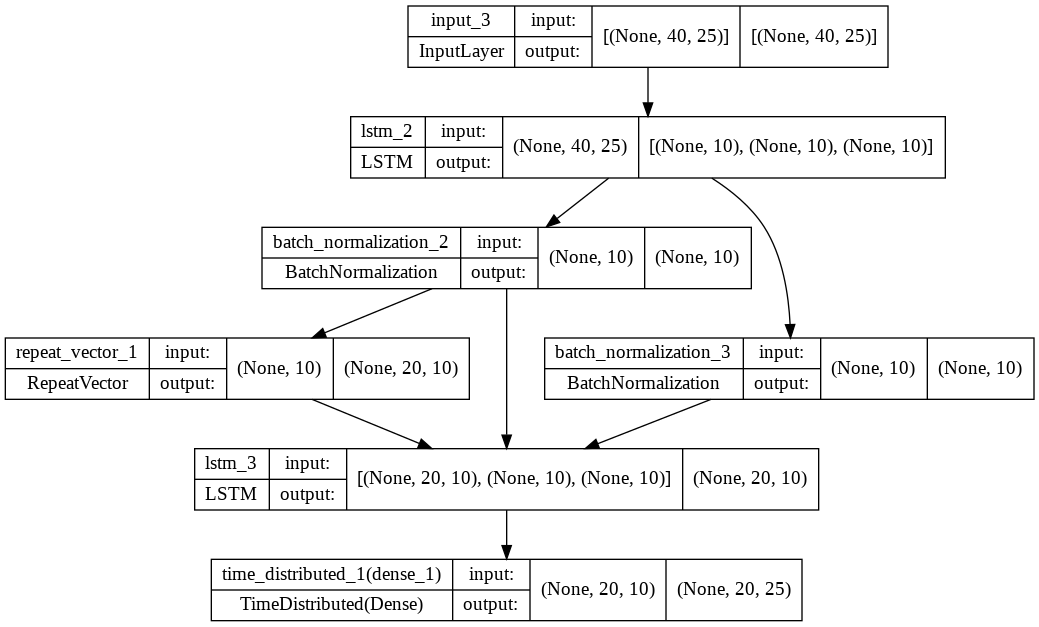

In [ ]:
# Plot the model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



In [ ]:
# Training The Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
epc = 20
es = EarlyStopping(monitor='val_loss', mode='min', patience=50)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epc, verbose=1, callbacks=[es], batch_size=20)
train_mae = history.history['mae']
valid_mae = history.history['val_mae']
#model.save('model11_forecasting_seq2seq.txt')



Epoch 1/20
50/50 [==============================] - 27s 349ms/step - loss: 0.5896 - mae: 0.3539 - val_loss: 0.0633 - val_mae: 0.1234
Epoch 2/20
50/50 [==============================] - 16s 329ms/step - loss: 0.0951 - mae: 0.1345 - val_loss: 0.0372 - val_mae: 0.0822
Epoch 3/20
50/50 [==============================] - 16s 327ms/step - loss: 0.0716 - mae: 0.1067 - val_loss: 0.0292 - val_mae: 0.0692
Epoch 4/20
50/50 [==============================] - 16s 323ms/step - loss: 0.0589 - mae: 0.0946 - val_loss: 0.0203 - val_mae: 0.0569
Epoch 5/20
50/50 [==============================] - 18s 365ms/step - loss: 0.0552 - mae: 0.0946 - val_loss: 0.0275 - val_mae: 0.0645
Epoch 6/20
50/50 [==============================] - 16s 325ms/step - loss: 0.0517 - mae: 0.0916 - val_loss: 0.0265 - val_mae: 0.0657
Epoch 7/20
50/50 [==============================] - 16s 323ms/step - loss: 0.0459 - mae: 0.0817 - val_loss: 0.0307 - val_mae: 0.0678
Epoch 8/20
50/50 [==============================] - 16s 323ms/step - 

In [ ]:
import math
print("train mae: ",np.mean(history.history['mae']))
print("validation mae: ",np.mean(history.history['val_mae']))
print("train mse: ",np.mean(history.history['loss']))
print("validation mse: ",np.mean(history.history['val_loss']))
print("train RMSE: ",math.sqrt(np.mean(history.history['loss'])))
print("validation RMSE: ",math.sqrt(np.mean(history.history['val_loss'])))



train mae:  0.09433219153434039
validation mae:  0.0642898615449667
train mse:  0.07109152218326927
validation mse:  0.024918446457013486
train RMSE:  0.2666299348971703
validation RMSE:  0.15785577739510673


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


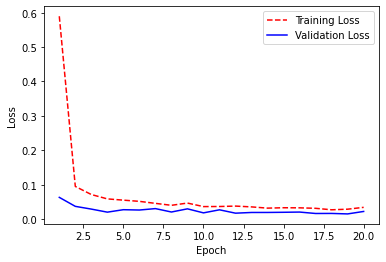

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

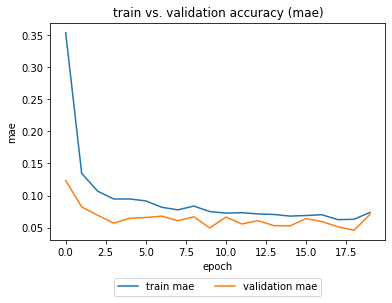

In [ ]:
plt.plot(train_mae, label='train mae'), 
plt.plot(valid_mae, label='validation mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.title('train vs. validation accuracy (mae)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

**Prediction:The model prediction as well as the true values are unnormalised**

In [ ]:
#train_pred= model.predict(X_train)
test_pred= model.predict(X_test)
train_true_detrend = y_train
#print(train_pred.shape, train_true_detrend.shape)
test_true = y_test
print(test_pred.shape)
print(test_true.shape)

(308, 20, 25)
(308, 20, 25)


In [ ]:
FArrays=[]
y_pred=test_pred
print(len(y_test))
print(len(y_pred))
print(y_test.shape)
print(y_pred.shape)
for l in range(0, len(y_test)):
   r=np.linalg.norm(y_test[l]-y_pred[l], 'fro')
   print(r)
   FArrays.append(r)   
print("FArrays :",FArrays)
F=np.sum(FArrays)  
print("Frobenius norm :", F/len(test_pred))



308
308
(308, 20, 25)
(308, 20, 25)
2.1163997069144536
1.60549098155428
4.509347642368847
1.6579151941813104
1.3937120491598576
1.6348562661897816
1.1113832898063911
1.1961867530110843
1.7104356420310485
1.760547465694625
1.640042574456147
1.3203210382499069
2.635134535979349
2.1223719414695514
1.2478941537692956
2.35636236788226
1.4573374116121534
1.3992126007721402
4.911187891897228
1.8895996260473438
1.6899137064382421
1.9443404314080963
1.6448652662366088
0.9411190152790835
1.5231384457016113
1.6965180490386806
2.424171537565341
1.0530662140237534
2.2924995089432705
1.136622030235493
1.335665943054728
4.707853766419503
2.8740404639705392
1.5968315456201732
1.7953939128409533
0.9359070980639549
2.852851840752575
1.6712054304842132
3.920581955012819
2.4505215954572392
1.4902859584630728
1.8428627995958053
1.36464384307872
1.5924101053037127
1.5050344705049492
2.9896798831019042
1.5566719715607362
2.361694484624959
1.891254300935418
1.617934515260168
3.342291793247723
1.39113036233711

In [ ]:
r1=np.linalg.norm(y_test[40], 'fro')
r2=np.linalg.norm(y_pred[40], 'fro')
print("y_test[40]",r1)
print("y_pred[40]",r2)
print("y_test[40] Minus y_pred[40]",r1-r2)
print(np.linalg.norm(y_test[40]- y_pred[40], 'fro'))

y_test[40] 25.49145822149323
y_pred[40] 25.380875
y_test[40] Minus y_pred[40] 0.11058358770416632
2.3046813842148177


In [ ]:
r3=np.linalg.norm(y_test[300], 'fro')
r4=np.linalg.norm(y_pred[300], 'fro')
print("y_test[300]",r3)
print("y_pred[300]",r4)
print("y_test[300] Minus y_pred[300]",r3-r4)
print(np.linalg.norm(y_test[300]-y_pred[300], 'fro'))

y_test[300] 25.534151737871003
y_pred[300] 25.29061
y_test[300] Minus y_pred[300] 0.24354237812979207
1.844539876135532


In [ ]:
r5=np.linalg.norm(y_test[5], 'fro')
r6=np.linalg.norm(y_pred[5], 'fro')
print("y_test[5]",r5)
print("y_pred[5]",r6)
print("y_test[5] Minus y_pred[5]",r5-r6)
print(np.linalg.norm(y_test[5]-y_pred[5], 'fro'))

y_test[5] 25.545362093689313
y_pred[5] 25.42365
y_test[5] Minus y_pred[5] 0.12171135211216466
2.604393315573312


In [ ]:
print("y_test[0]")
df = pd.DataFrame(y_test[0])
df

y_test[0]


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.252672,0.252672,0.330342,0.252672,0.252672,0.252672,0.266558,-5.128784,0.252672,0.252672,...,0.252672,0.252672,-0.407013,0.252672,0.252672,-2.135914,0.252672,0.252672,0.252672,0.252672
1,0.251803,0.251803,0.329848,0.251803,0.251803,0.251803,0.265701,-5.140384,0.251803,0.251803,...,0.251803,0.251803,-0.391853,0.251803,0.251803,-2.113805,0.251803,0.251803,0.251803,0.251803
2,0.252361,0.252361,0.330895,0.252361,0.252361,0.252361,0.266324,-5.135268,0.252361,0.252361,...,0.252361,0.252361,-0.406743,0.252361,0.252361,-2.121309,0.252361,0.252361,0.252361,0.252361
3,0.253936,0.253936,0.342214,0.253936,0.253936,0.253936,0.268438,-5.104711,0.253936,0.253936,...,0.253936,0.253936,-0.434822,0.253936,0.253936,-2.181320,0.253936,0.253936,0.253936,0.253936
4,0.252477,0.252477,0.335278,0.252477,0.252477,0.252477,0.266812,-5.124871,0.252477,0.252477,...,0.252477,0.252477,-0.400143,0.252477,0.252477,-2.146424,0.252477,0.252477,0.252477,0.252477
5,0.252104,0.252104,0.331773,0.252104,0.252104,0.252104,0.266259,-5.142337,0.252104,0.252104,...,0.252104,0.252104,-0.410503,0.252104,0.252104,-2.104116,0.252104,0.252104,0.252104,0.252104
6,0.253532,0.253532,0.342769,0.253532,0.253532,0.253532,0.268156,-5.110416,0.253532,0.253532,...,0.253532,0.253532,-0.429078,0.253532,0.253532,-2.170332,0.253532,0.253532,0.253532,0.253532
7,0.254187,0.254187,0.343129,0.254187,0.254187,0.254187,0.268833,-5.105725,0.254187,0.254187,...,0.254187,0.254187,-0.448277,0.254187,0.254187,-2.175202,0.254187,0.254187,0.254187,0.254187
8,0.253550,0.253550,0.340505,0.253550,0.253550,0.253550,0.268063,-5.107935,0.253550,0.253550,...,0.253550,0.253550,-0.422199,0.253550,0.253550,-2.177821,0.253550,0.253550,0.253550,0.253550
9,0.254121,0.254121,0.346177,0.254121,0.254121,0.254121,0.268882,-5.092010,0.254121,0.254121,...,0.254121,0.254121,-0.427454,0.254121,0.254121,-2.210976,0.254121,0.254121,0.254121,0.254121


In [ ]:
print("test_Pred[0]")
df = pd.DataFrame(test_pred[0])
df

test_Pred[0]


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.191284,0.220020,0.449852,0.217819,0.188792,0.206008,0.231491,-5.688871,0.222096,0.196400,...,0.226417,0.204682,-0.515639,0.192618,0.206452,-1.966832,0.223661,0.192848,0.197297,0.193226
1,0.188832,0.217351,0.334641,0.216964,0.188785,0.203818,0.227827,-5.497672,0.250963,0.194447,...,0.227088,0.202388,-0.572312,0.192419,0.206185,-1.741046,0.220361,0.193521,0.197897,0.192270
2,0.186069,0.214334,0.346461,0.214328,0.186197,0.201024,0.225634,-5.427194,0.255199,0.191848,...,0.224716,0.199472,-0.585042,0.190027,0.203717,-1.702662,0.217245,0.191202,0.195763,0.189713
3,0.184300,0.212289,0.346528,0.212622,0.184632,0.199208,0.223999,-5.369480,0.259293,0.190172,...,0.223212,0.197625,-0.584612,0.188576,0.202202,-1.673124,0.215086,0.189861,0.194558,0.188114
4,0.183097,0.210859,0.343532,0.211439,0.183583,0.197943,0.222771,-5.330459,0.262194,0.188996,...,0.222155,0.196365,-0.579993,0.187587,0.201174,-1.647990,0.213568,0.188968,0.193747,0.187027
5,0.182301,0.209881,0.340223,0.210639,0.182893,0.197080,0.221896,-5.305248,0.264141,0.188188,...,0.221428,0.195523,-0.573834,0.186923,0.200491,-1.628835,0.212528,0.188383,0.193210,0.186309
6,0.181802,0.209241,0.337343,0.210127,0.182460,0.196514,0.221302,-5.289779,0.265408,0.187655,...,0.220950,0.194985,-0.567272,0.186499,0.200062,-1.615341,0.211846,0.188023,0.192875,0.185860
7,0.181513,0.208844,0.334961,0.209823,0.182208,0.196163,0.220919,-5.280869,0.266224,0.187323,...,0.220658,0.194661,-0.560812,0.186248,0.199817,-1.606442,0.211422,0.187822,0.192686,0.185605
8,0.181370,0.208619,0.332993,0.209667,0.182082,0.195964,0.220689,-5.276250,0.266753,0.187134,...,0.220501,0.194487,-0.554709,0.186118,0.199700,-1.601010,0.211180,0.187734,0.192602,0.185485
9,0.181325,0.208512,0.331350,0.209612,0.182042,0.195870,0.220566,-5.274361,0.267101,0.187044,...,0.220438,0.194414,-0.549097,0.186072,0.199671,-1.598078,0.211064,0.187721,0.192589,0.185456


In [ ]:
print(np.linalg.norm(y_test[250]-test_pred[250], 'fro'))

2.500294578595354


In [ ]:
#print("train_Pred:",train_pred.shape)
#print("train_true:",y_train.shape)
print("test_Pred:",test_pred.shape)
print("test_true:",y_test.shape)

test_Pred: (308, 20, 25)
test_true: (308, 20, 25)


**Printing mean_absolute_error, mean_squared_error and train root mean square error for the train and test predictions**



In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


te=[]
tb=[]
for l in range(0, len(test_pred)):
  t=mean_absolute_error(y_test[l], test_pred[l])
  td=mean_squared_error(y_test[l], test_pred[l])
  te.append(t)
  tb.append(td)
  #print(t)
test_mae= np.sum(te)/len(test_pred)
test_mse= np.sum(td)/len(test_pred)
RMSEtest = math.sqrt(test_mse)

print("test_mae",test_mae)
print("test_mse",test_mse)
print("Test Root Mean Square Error:",RMSEtest)




test_mae 0.06075111618678917
test_mse 2.1567927438415825e-05
Test Root Mean Square Error: 0.0046441282754049575
